In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
train_path = pd.read_csv("train.csv")
train_path

,input_image_path,gt_image_path
0,./train_input/TRAIN_00000.png,./train_gt/TRAIN_00000.png
1,./train_input/TRAIN_00001.png,./train_gt/TRAIN_00001.png
2,./train_input/TRAIN_00002.png,./train_gt/TRAIN_00002.png
3,./train_input/TRAIN_00003.png,./train_gt/TRAIN_00003.png
4,./train_input/TRAIN_00004.png,./train_gt/TRAIN_00004.png
...,...,...
29598,./train_input/TRAIN_29598.png,./train_gt/TRAIN_29598.png
29599,./train_input/TRAIN_29599.png,./train_gt/TRAIN_29599.png
29600,./train_input/TRAIN_29600.png,./train_gt/TRAIN_29600.png
29601,./train_input/TRAIN_29601.png,./train_gt/TRAIN_29601.png


In [9]:
path = os.getcwd()
path

'C:\\Users\\b1005\\DACON\\Image_Net'

In [17]:
train_0_path = train_path.iloc[0]['input_image_path']
gt_0_path = train_path.iloc[0]['gt_image_path']
print(train_0_path)
print(gt_0_path)

./train_input/TRAIN_00000.png
./train_gt/TRAIN_00000.png


In [19]:
input_file_path = path + "/train_input/TRAIN_00000.png"
gt_file_path = path + '/train_gt/TRAIN_00000.png'

In [53]:
# 이미지 불러오기
images = []
input_image = cv2.imread(input_file_path)
gt_image = cv2.imread(gt_file_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
gt_image_rgb = cv2.cvtColor(gt_image, cv2.COLOR_BGR2RGB)
images.append(input_image_rgb) #rgb 변환하여 저장

# 마스크 생성
difference = cv2.absdiff(input_image_rgb, gt_image_rgb)
_, mask = cv2.threshold(cv2.cvtColor(difference, cv2.COLOR_RGB2GRAY), 30, 255, cv2.THRESH_BINARY)

#테슬라, 네이비어-스토크 알고리즘 사용하여 복원
inpaint_telea = cv2.inpaint(input_image_rgb, mask, 3, cv2.INPAINT_TELEA)
inpaint_ns = cv2.inpaint(input_image_rgb, mask, 3, cv2.INPAINT_NS)

repaired_images_telea = []
repaired_images_ns = []
repaired_images_telea.append(inpaint_telea)
repaired_images_ns.append(inpaint_ns)

512


In [57]:
input_image.shape

(512, 512, 3)

In [59]:
print(input_image_rgb[0, 0]) 

[126 126 126]


In [61]:
print(gt_image_rgb[0, 0]) 

[ 57 146 206]


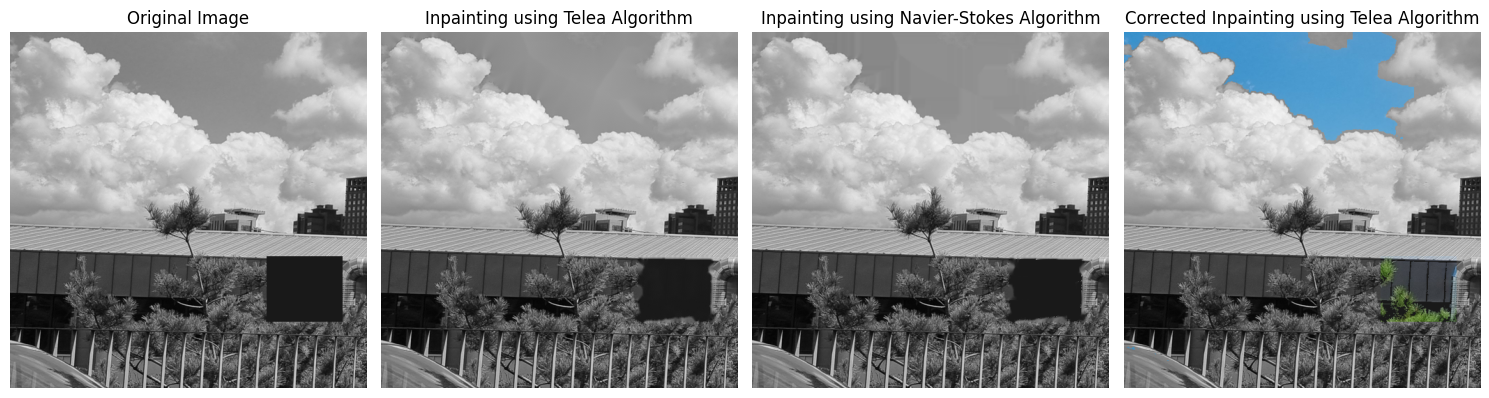

In [67]:
corrected_inpaint_telea = inpaint_telea.copy()
repaired_images_ns = 

# 마스크 영역에서 train_gt의 컬러 정보를 반영
corrected_inpaint_telea[mask == 255] = gt_image_rgb[mask == 255]

# 결과 시각화
plt.figure(figsize=(15, 10))

# 원본 이미지
plt.subplot(1, 4, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')

# Telea 알고리즘을 사용한 복원 이미지
plt.subplot(1, 4, 2)
plt.imshow(repaired_images_telea[0])
plt.title('Inpainting using Telea Algorithm')
plt.axis('off')

# Navier-Stokes 알고리즘을 사용한 복원 이미지
plt.subplot(1, 4, 3)
plt.imshow(repaired_images_ns[0])
plt.title('Inpainting using Navier-Stokes Algorithm')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(corrected_inpaint_telea)
plt.title('Corrected Inpainting using Telea Algorithm')
plt.axis('off')

plt.tight_layout()
plt.show()

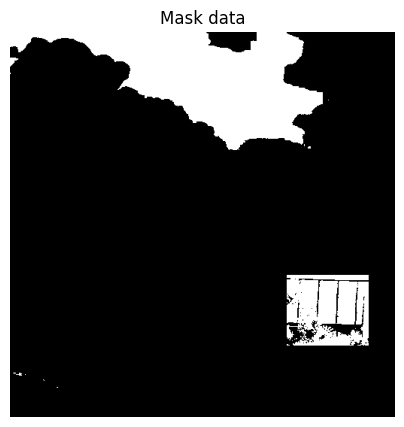

In [71]:
# 마스크 시각화
plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title('Mask data')
plt.axis('off')
plt.show()